# Curve fitting / Linear regression
Remember: Linear does **not** mean linear in $x$ but linear in $w$!

In [4]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive, FloatSlider
from IPython.display import display
from numpy.polynomial.polynomial import polyvander

Do you know what the command **%debug** do in ipython/jupyter?
Type it in an empty cell and execute the cell when encounter an excpetion.

Do you know what **Shift** + **Tab** does?

# Task 1.2

In [5]:
N = 10
sigma = 0.18

In [6]:
x = np.linspace(0, 1, num=5)
M = 2
X = np.polynomial.polynomial.polyvander(x, M)  # REPLACE X = ???
print(X)

[[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]


In [ ]:
def get_weight_vector(x, y, M):
    # Your code here
    assert x.shape == (N,), x.shape  
    assert y.shape == (N,), y.shape  
    X = np.polynomial.polynomial.polyvander(x, M)  
    assert X.shape == (N, M+1), X.shape  
    # Stable  
    w = np.linalg.lstsq(X, y, rcond=None)[0]  
    # Unstable  
#     w = np.linalg.solve(X.T @ X, X.T @ y)  
    assert w.shape == (M+1,), w.shape
    return w   

def plot_result(order):
    x_smooth = np.linspace(0, 1, 100)
    y_smooth = np.sin(2*np.pi*x_smooth)
    plt.plot(x_smooth, y_smooth, label='Ground truth', linestyle='--')
    
    x = np.linspace(0, 1, num=N)
    y = np.sin(2*np.pi*x) + np.random.normal(0, sigma, size=N)
    w = get_weight_vector(x, y, order)
    plt.scatter(x, y, label='Train data')
    
    y_smooth_hat = polyvander(x_smooth, order) @ w
    plt.plot(x_smooth, y_smooth_hat, label='Regression')
    
    plt.legend()
    plt.show()

In [ ]:
display(interactive(
    plot_result,
    order=IntSlider(min=0, max=N-1)
))

interactive(children=(IntSlider(value=0, description='order', max=9), Output()), _dom_classes=('widget-interac…

In [6]:
plt.close("all")

# Task 1.3
**Note**: The coefficients should still be calculated using the old number of samples

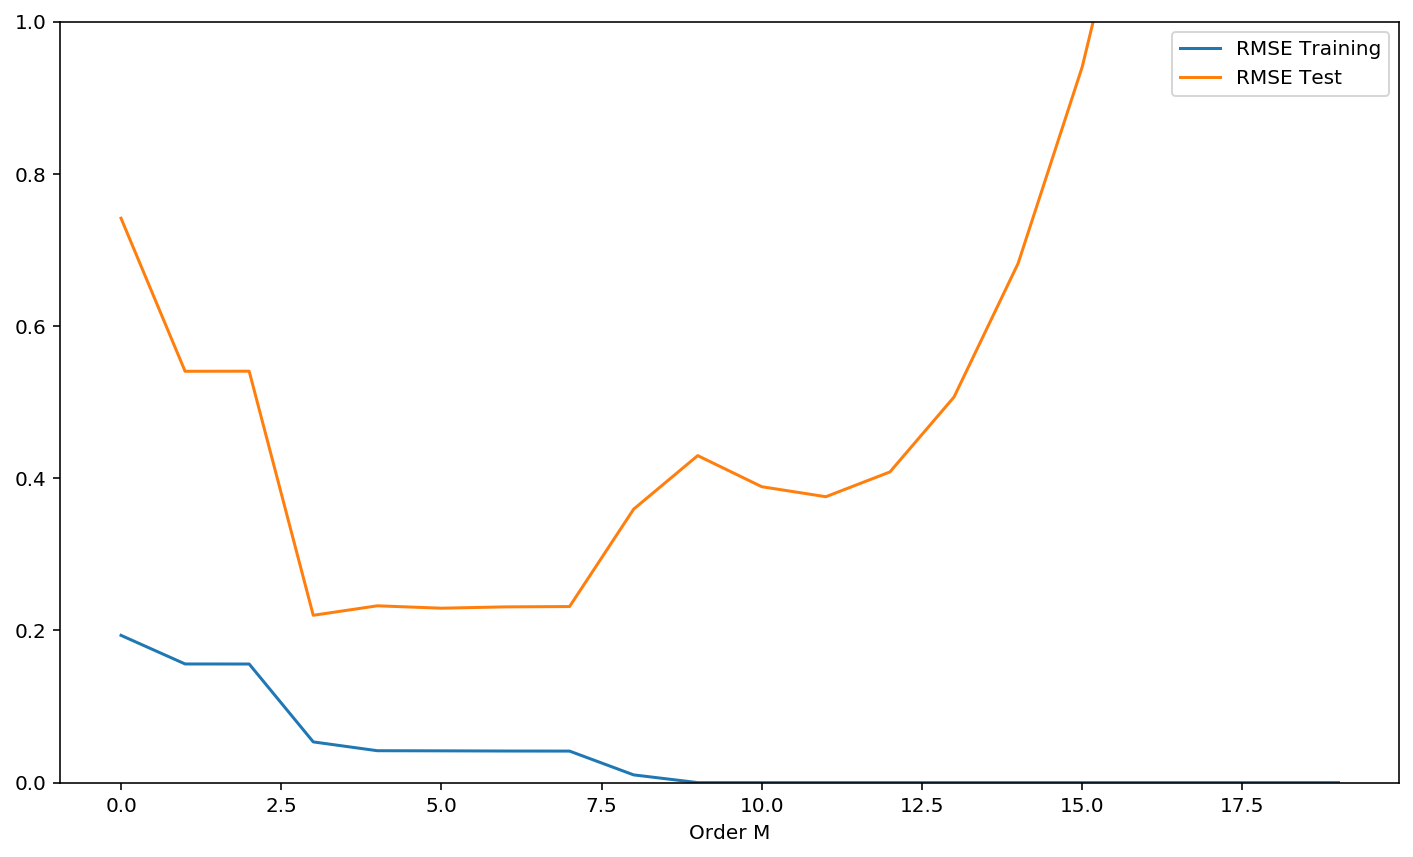

In [ ]:
def calculate_rmse(w, x, y):
    """Calculate and return RMSE
    """
    y_hat = polyvander(x, w.size-1) @ w  
    rmse = np.sqrt(np.sum((y - y_hat)**2) / 100)  
    return rmse  

x_train = np.linspace(0, 1, num=N)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, sigma, size=N)

# 100 new test examples with x in [0, 1]
x_test = np.linspace(0, 1, num=100)  
y_test = np.sin(2*np.pi*x_test) + np.random.normal(0, sigma, size=100) 

# Calculate weight vectors for different Ms
weight_vectors = [
    get_weight_vector(x_train, y_train, M)
    for M in range(20)  
]
# Calculate rmse for M=0...10
rmse = [calculate_rmse(w, x_train, y_train) for w in weight_vectors]
plt.plot(rmse, label='RMSE Training')
rmse = [calculate_rmse(w, x_test, y_test) for w in weight_vectors]
plt.plot(rmse, label='RMSE Test')
plt.legend()
plt.xlabel('Order M')
plt.ylim(0, 1)
plt.show()

# Task 1.5

**Additional notes**:
- ``lambda`` is a reserved keyword in python (for an anonymous function) so please use another name for the variable
- Can you now increase the polynomial order?
- How does the regularization influence stability of the matrix inversion?

In [ ]:
def get_weight_vector_regularized(x, y, M, lambda_):
    # Your code here
    X = polyvander(x, M)  
    A = X.T @ X 
    return np.linalg.lstsq(A + lambda_ * np.eye(A.shape[0]), X.T @ y)[0]


def plot_result(order, ln_lambda):
    x_smooth = np.linspace(0, 1, 100)
    y_smooth = np.sin(2*np.pi*x_smooth)
    plt.plot(x_smooth, y_smooth, label='Ground truth', linestyle='--')
    
    x = np.linspace(0, 1, num=N)
    y = np.sin(2*np.pi*x) + np.random.normal(0, sigma, size=N)
    
    w = get_weight_vector(x, y, order)
    y_smooth_est = polyvander(x_smooth, order) @ w
    plt.plot(x_smooth, y_smooth_est, label='Regression')
    
    w = get_weight_vector_regularized(x, y, order, np.exp(ln_lambda))
    y_smooth_est = polyvander(x_smooth, order) @ w
    plt.plot(x_smooth, y_smooth_est, label='Regression regularized')
     
    plt.scatter(x, y, label='Train data')
    plt.legend()

In [ ]:
display(interactive(
    plot_result,
    order=IntSlider(min=0, max=N-1),  
    ln_lambda=FloatSlider(min=-40, max=0, step=4), 
))

interactive(children=(IntSlider(value=0, description='order', max=9), FloatSlider(value=0.0, description='ln_l…

# Task 1.6

<ipython-input-8-9a069d58d670>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A + lambda_ * np.eye(A.shape[0]), X.T @ y)[0]  # REPLACE return ???


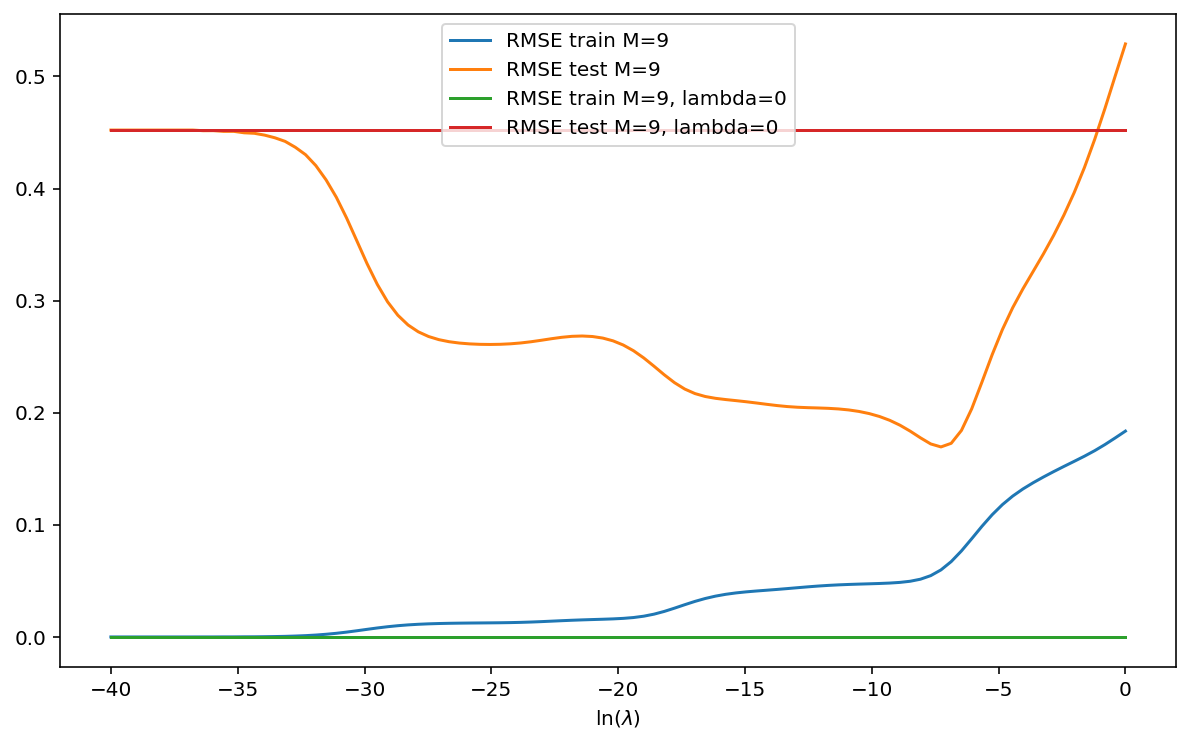

In [ ]:
M = 9  
ln_lmbda_values = np.linspace(-40, -0, num=100)  

x_train = np.linspace(0, 1, num=N)
y_train = np.sin(2*np.pi*x_train) + np.random.normal(0, sigma, size=N)

x_test = np.linspace(0, 1, num=100)  
y_test = np.sin(2*np.pi*x_test) + np.random.normal(0, sigma, size=100)  

rmse_train = []
rmse_test = []
for ln_lmbda in ln_lmbda_values:
    w = get_weight_vector_regularized(x_train, y_train, M, np.exp(ln_lmbda))
    rmse_train.append(calculate_rmse(w, x_train, y_train))
    rmse_test.append(calculate_rmse(w, x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(ln_lmbda_values, rmse_train, label=f'RMSE train M={M}')
plt.plot(ln_lmbda_values, rmse_test, label=f'RMSE test M={M}')
plt.xlabel('$\ln(\lambda)$')

w = get_weight_vector(x_train, y_train, M)
rmse_train_wo_reg = calculate_rmse(w, x_train, y_train)
rmse_test_wo_reg = calculate_rmse(w, x_test, y_test)

plt.plot([min(ln_lmbda_values), max(ln_lmbda_values)],
         [rmse_train_wo_reg, rmse_train_wo_reg],
         label=f'RMSE train M={M}, lambda=0')
plt.plot([min(ln_lmbda_values), max(ln_lmbda_values)],
         [rmse_test_wo_reg, rmse_test_wo_reg],
         label=f'RMSE test M={M}, lambda=0')

plt.legend()
plt.show()

# Task 1.10

In [ ]:
def calc_mean_and_var(x, x_train, y_train, var_e, var_w, M):
    """ Calculate the mean and variance of the predictive distribution
    
    :param x: Point for the prediction
    :param x_train: Vector with training data points
    :param Y_train: Vector with training targets
    :param var_w: Variance for the prior of w
    :param M: Order of the polynomial
    
    """
    # Your code here
    X = polyvander(x, M)  
    X_train = polyvander(x_train, M)  
    S = np.linalg.inv(1 / var_w * np.eye(M+1) + 1/var_e * X_train.T @ X_train)  
    m = 1/var_e * S @ X_train.T @ y_train  
    mean = X @ m  
    var = X @ S @ X.T  
    return mean[0], var[0][0] 

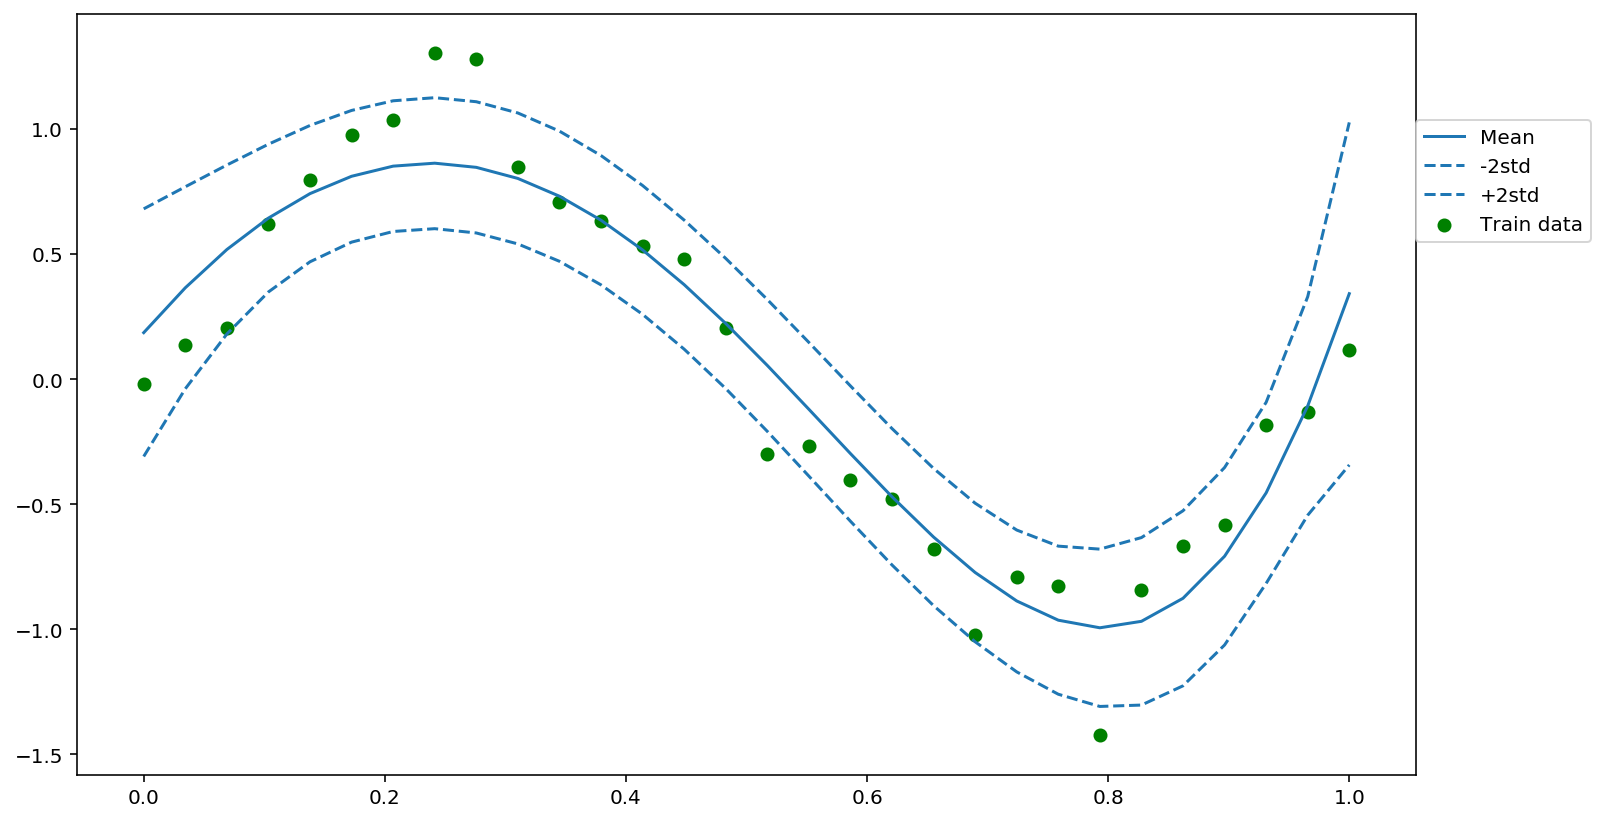

In [12]:
N = 30  # Number of training samples
sigma = 0.18  # Variance of the observation noise
sigma_w = 300*sigma  # Variance of the prior distribution for w
M = 8  # Order of the model

x_train = np.linspace(0, 1, num=N)
y_train = np.sin(2*np.pi*x_train) + np.random.normal(0, sigma, size=N)
mean = np.asarray([calc_mean_and_var(x, x_train, y_train, sigma, sigma_w, M)[0] for x in x_train])
var = np.asarray([calc_mean_and_var(x, x_train, y_train, sigma, sigma_w, M)[1] for x in x_train])
mean_line = plt.plot(x_train, mean, label='Mean')
plt.plot(x_train, (mean - 2*np.sqrt(var)), color=mean_line[0].get_color(), linestyle='--', label='-2std')
plt.plot(x_train, (mean + 2*np.sqrt(var)), color=mean_line[0].get_color(), linestyle='--', label='+2std')
plt.scatter(x_train, y_train, label='Train data', color='g')
plt.legend(loc=[1, 0.7])
plt.show()